In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('spotify dataset.csv')

# Display the column names in your DataFrame
print("Column Names:", df.columns)

Column Names: Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [3]:
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [4]:
print(df.tail())

                     track_id                            track_name  \
32828  7bxnKAamR3snQ1VGLuVfC1  City Of Lights - Official Radio Edit   
32829  5Aevni09Em4575077nkWHz   Closer - Sultan & Ned Shepard Remix   
32830  7ImMqPP3Q1yfUHvsdn7wEo          Sweet Surrender - Radio Edit   
32831  2m69mhnfQ1Oq6lGtXuYhgX        Only For You - Maor Levi Remix   
32832  29zWqhca3zt5NsckZqDf6c                Typhoon - Original Mix   

         track_artist  track_popularity          track_album_id  \
32828    Lush & Simon                42  2azRoBBWEEEYhqV6sb7JrT   
32829  Tegan and Sara                20  6kD6KLxj7s8eCE3ABvAyf5   
32830     Starkillers                14  0ltWNSY9JgxoIZO4VzuCa6   
32831          Mat Zo                15  1fGrOkHnHJcStl14zNx8Jy   
32832    Julian Calor                27  0X3mUOm6MhxR7PzxG95rAo   

                   track_album_name track_album_release_date    playlist_name  \
32828    City Of Lights (Vocal Mix)               2014-04-28  ♥ EDM LOVE 2020   
32829   

In [5]:
# Find the total number of rows
total_rows = df.shape[0]

# Print the result
print("Total Rows:", total_rows)

Total Rows: 32833


In [6]:
#display the information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [7]:
# Handling Missing Values
df.dropna(inplace=True)

# Handling Duplicates
df.drop_duplicates(inplace=True)


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split  

# Feature Selection
selected_features = ['track_id', 'track_name', 'track_artist', 'track_popularity',
                     'track_album_id', 'track_album_name', 'track_album_release_date',
                     'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
                     'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                     'duration_ms']
df = df[selected_features]

# Data Transformation
label_encoder = LabelEncoder()
df['playlist_genre'] = label_encoder.fit_transform(df['playlist_genre'])  # Encode categorical variable 'playlist_genre'

scaler = StandardScaler()
numeric_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                     'duration_ms']

df[numeric_features] = scaler.fit_transform(df[numeric_features])  # Standardize numerical features

# Data Splitting
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Save the Pre-processed Data
df.to_csv('preprocessed_data.csv', index=False)
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [9]:
pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


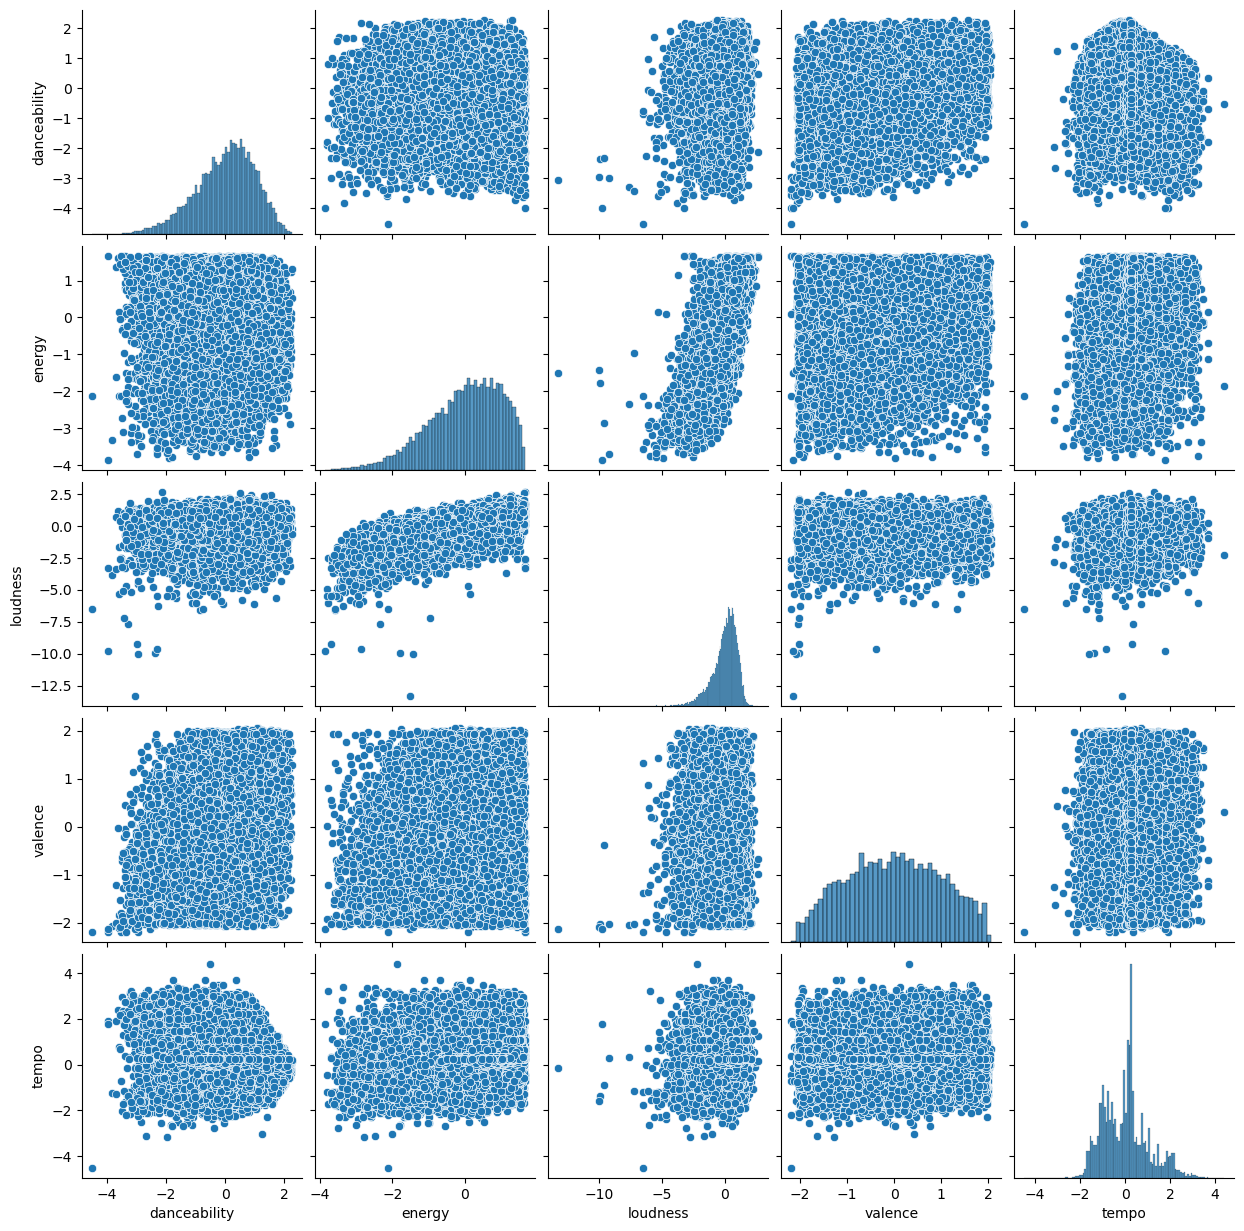

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for numeric features
sns.pairplot(df[['danceability', 'energy', 'loudness', 'valence', 'tempo']])
plt.show()

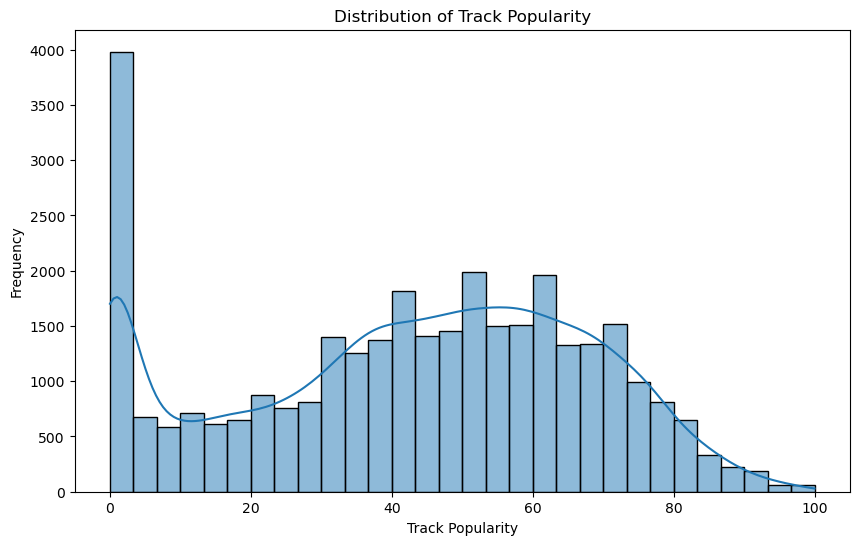

In [11]:

# Histogram for track_popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()


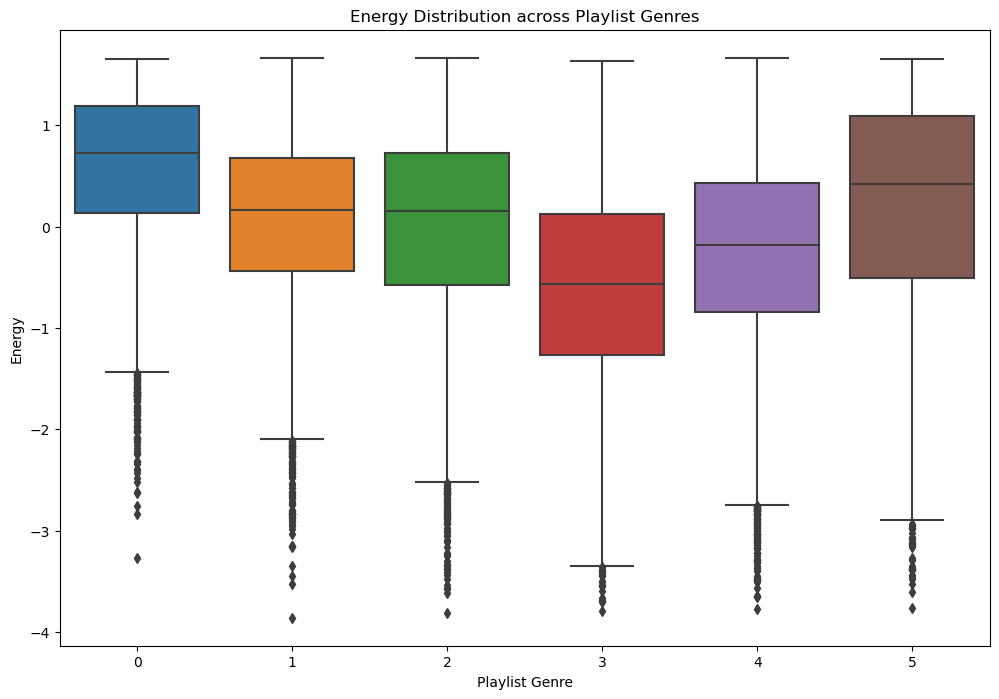

In [12]:

# Boxplot for playlist_genre vs energy
plt.figure(figsize=(12, 8))
sns.boxplot(x='playlist_genre', y='energy', data=df)
plt.title('Energy Distribution across Playlist Genres')
plt.xlabel('Playlist Genre')
plt.ylabel('Energy')
plt.show()


C:\Users\Vaishnavi Kshirsagar\AppData\Local\Temp\ipykernel_39328\2562466742.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


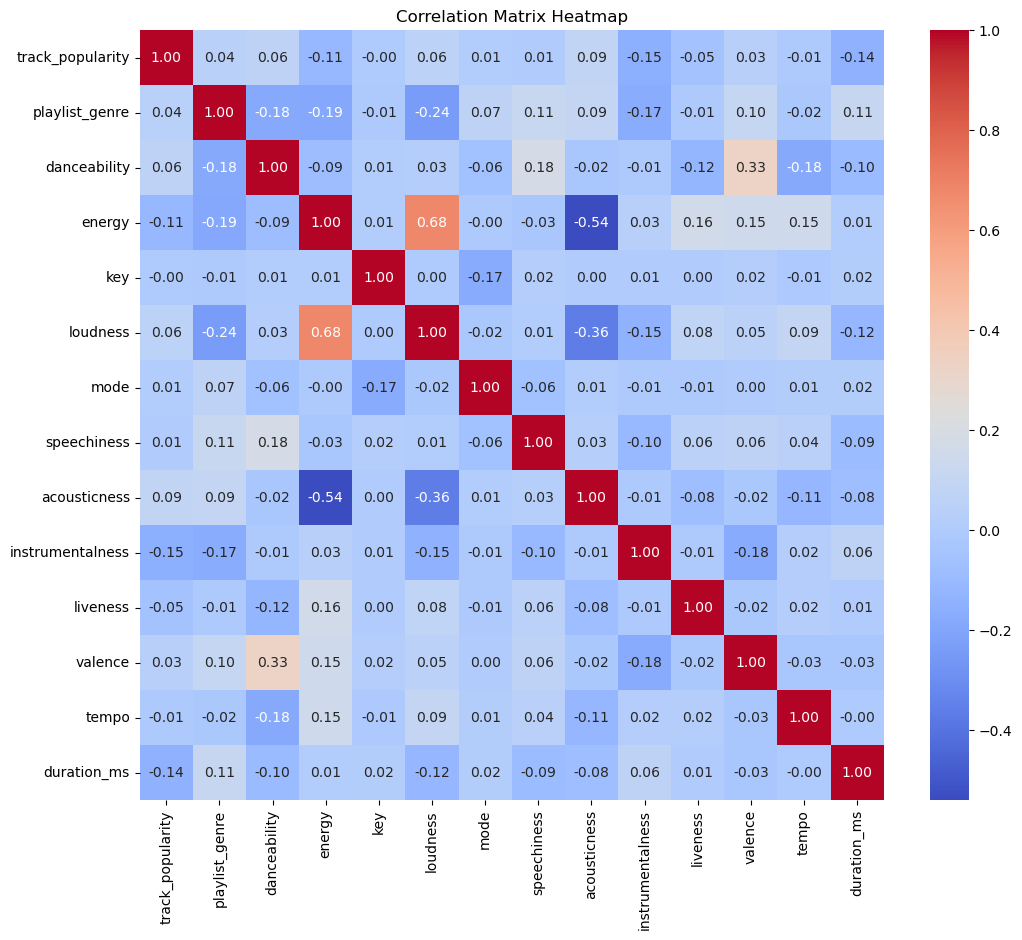

In [13]:

# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


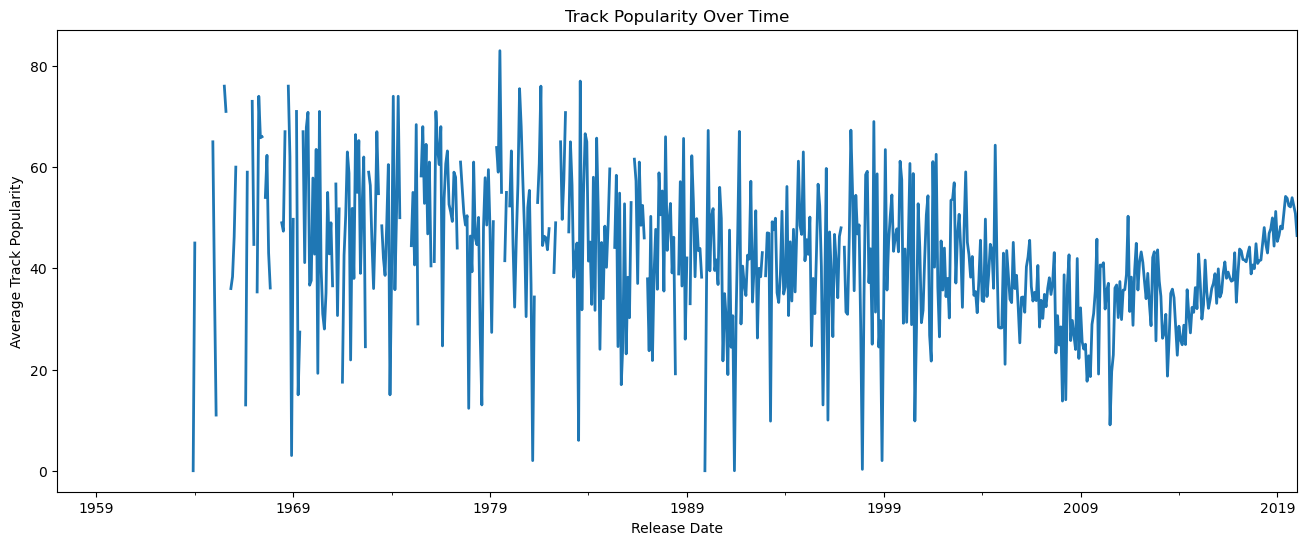

In [14]:
#Line Plot for Track Popularity Over Time (Release Date):
plt.figure(figsize=(16, 6))
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])
df.set_index('track_album_release_date')['track_popularity'].resample('M').mean().plot(linewidth=2)
plt.title('Track Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Average Track Popularity')
plt.show()


In [15]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


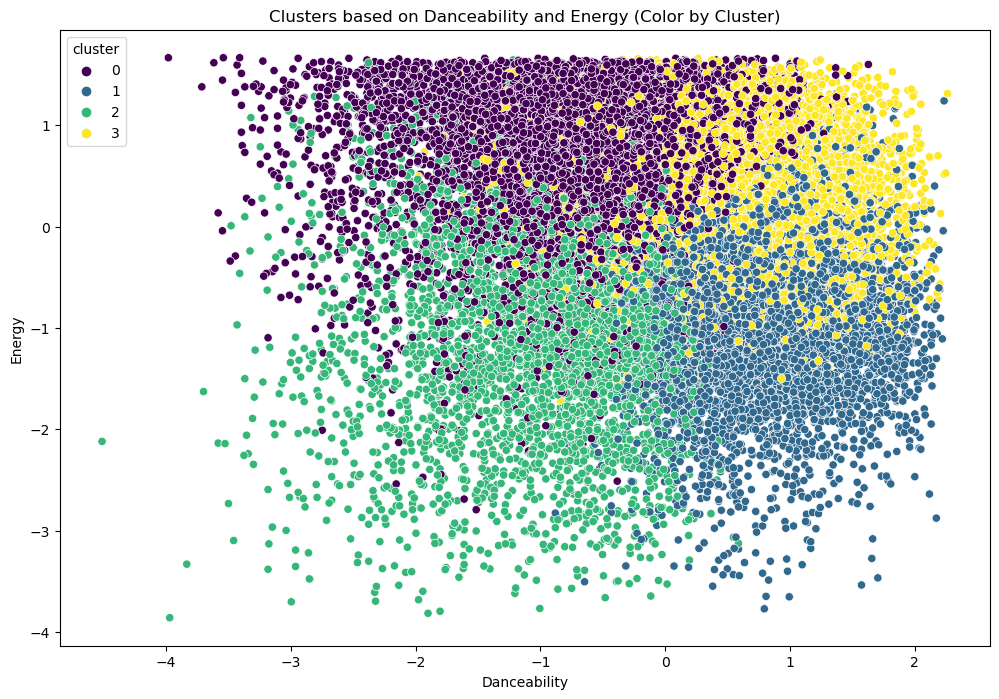

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Select relevant features for clustering (adjust as needed)
features_for_clustering = ['danceability', 'energy', 'valence', 'tempo']

# Extract features for clustering
X = df[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Specify the number of clusters (adjust as needed)
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters based on playlist genres
plt.figure(figsize=(12, 8))
sns.scatterplot(x='danceability', y='energy', hue='cluster', data=df, palette='viridis')
plt.title('Clusters based on Danceability and Energy (Color by Cluster)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129322 (\N{GRINNING FACE WITH ONE LARGE AND ONE SMALL EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128138 (\N{PILL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128057 (\N{HAMSTER FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\

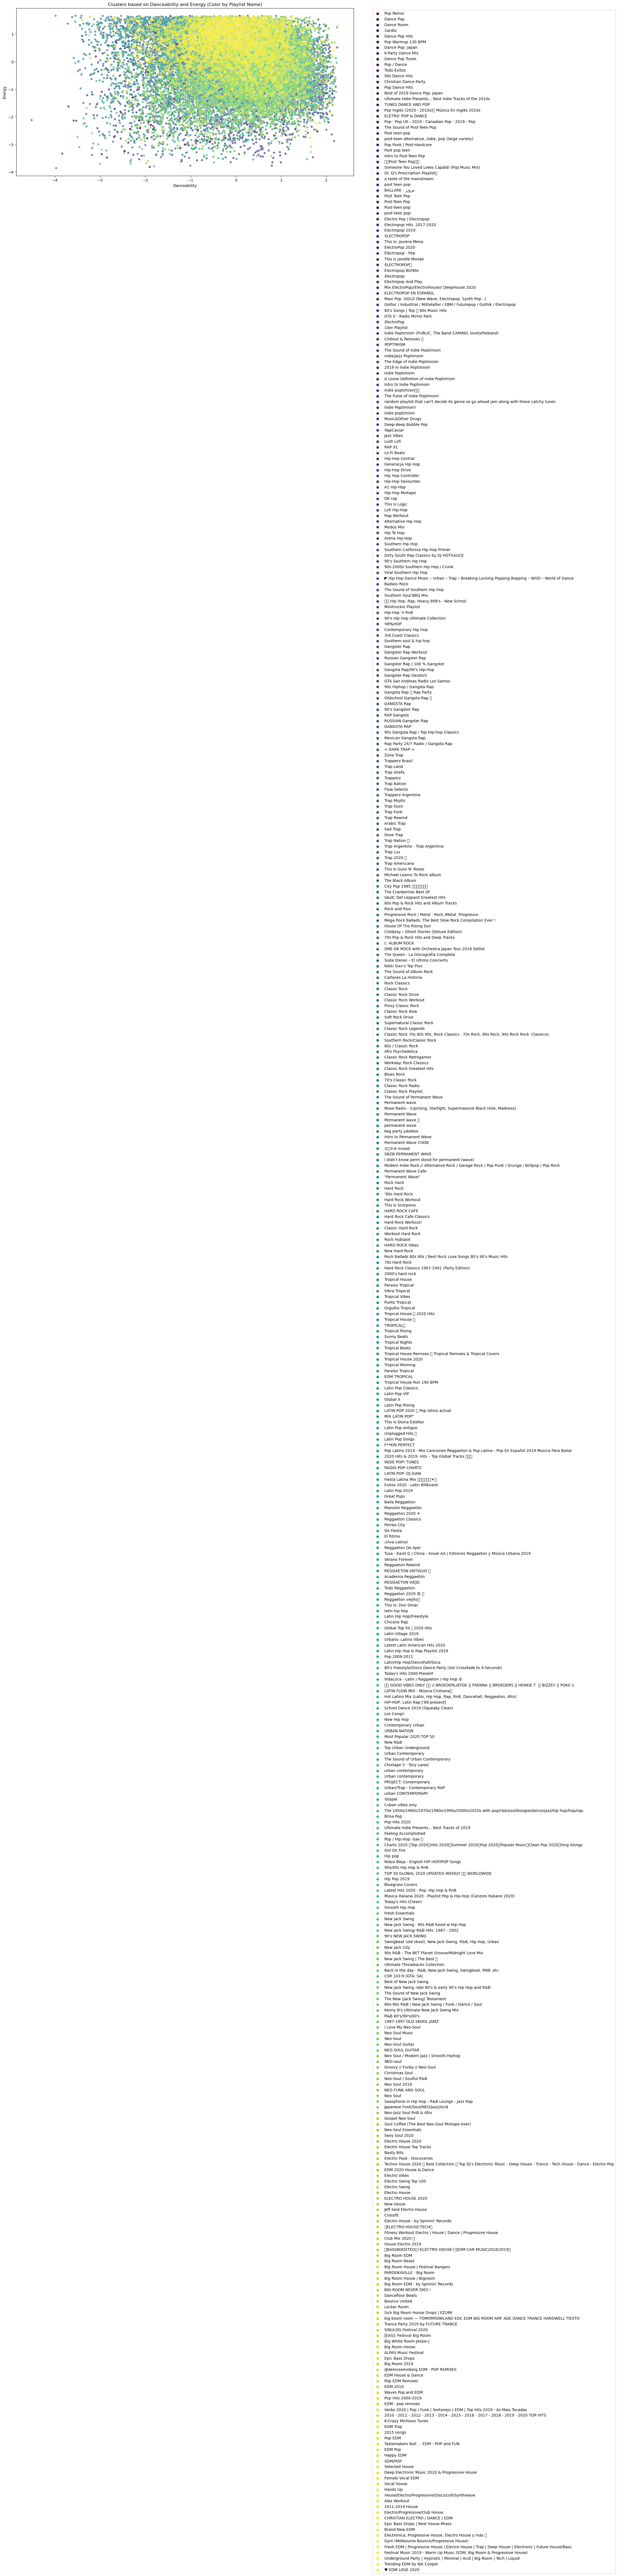

In [17]:

# Plot clusters based on playlist names
plt.figure(figsize=(16, 8))
sns.scatterplot(x='danceability', y='energy', hue='playlist_name', data=df, palette='viridis', alpha=0.7)
plt.title('Clusters based on Danceability and Energy (Color by Playlist Name)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_csv('spotify dataset.csv')

# Check if the 'track_name' column is present
if 'track_name' in df.columns:
    # Fill any missing values in 'track_name'
    df['track_name'].fillna('', inplace=True)

    # Create a CountVectorizer to convert text features into vectors
    vectorizer = CountVectorizer(stop_words='english')
    track_matrix = vectorizer.fit_transform(df['track_name'])

    # Calculate the cosine similarity between tracks
    cosine_sim = cosine_similarity(track_matrix, track_matrix)

    # Function to get recommendations based on cosine similarity
    def get_recommendations(track_name, cosine_sim_matrix, df):
        idx = df[df['track_name'] == track_name].index[0]
        sim_scores = list(enumerate(cosine_sim_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:6]  # Top 5 similar tracks (excluding itself)
        track_indices = [i[0] for i in sim_scores]
        return df['track_name'].iloc[track_indices]

 # Example: Choose a track name that exists in your dataset
track_to_recommend =  'Typhoon - Original Mix'

# Check if the chosen track name exists in the DataFrame
if track_to_recommend in df['track_name'].values:
    recommendations = get_recommendations(track_to_recommend, cosine_sim, df)

    # Display the recommendations
    print(f"Top 5 Recommendations for '{track_to_recommend}':")
    print(recommendations)
else:
    print(f"The track '{track_to_recommend}' does not exist in the DataFrame.")


Top 5 Recommendations for 'Typhoon - Original Mix':
20207     Down On This - Original Mix
20223         Into You - Original Mix
27125      You're Mine - Original Mix
27998    Can't You See - Original Mix
28535       Once Again - Original Mix
Name: track_name, dtype: object
